# Patterns Over Time (Exploratory Data Analysis in Python)

---

## 1. Patterns Over Time: Why Analyze Date/Time Data?

- **Motivation:**  
  When datasets include dates or times, analyzing patterns over time can reveal important trends and relationships.
- **Example:**  
  We'll work with a divorce dataset from Mexico (2000–2015), containing:
    - `marriage_date`: date of marriage
    - `marriage_duration`: duration (years) until divorce

---

## 2. Loading and Previewing the Data

```python
divorce = pd.read_csv("divorce.csv")
divorce.head()
```

**Expected Output:**

|   | marriage_date | marriage_duration |
|---|---------------|------------------|
| 0 | 2000-06-26    | 5.0              |
| 1 | 2000-02-02    | 2.0              |
| 2 | 1991-10-09    | 10.0             |
| 3 | 1993-01-02    | 10.0             |
| 4 | 1998-12-11    | 7.0              |

### Line-by-Line Explanation

- `divorce = pd.read_csv("divorce.csv")`
    - **What:** Reads the CSV file into a pandas DataFrame.
    - **Why:** To load our data for analysis.
    - **Result:** Creates a DataFrame called `divorce`.

- `divorce.head()`
    - **What:** Displays the first 5 rows of `divorce`.
    - **Why:** To preview the dataset's structure and contents.
    - **Result:** Shows columns for `marriage_date` (currently strings) and `marriage_duration`.

---

## 3. Importing DateTime Data: Understanding Data Types

```python
divorce.dtypes
```

**Expected Output:**
```
marriage_date        object
marriage_duration   float64
dtype: object
```

### Explanation

- `divorce.dtypes`
    - **What:** Shows data types of each column in the DataFrame.
    - **Why:** To check if pandas recognized the date column as a date/time type.
    - **Result:** `marriage_date` is of type `object` (string), not `datetime64[ns]`.

**Significance:**  
- By default, pandas reads dates as strings. This limits what you can do with date operations.

---

## 4. Importing DateTime Data: Parsing Dates on Import

```python
divorce = pd.read_csv("divorce.csv", parse_dates=["marriage_date"])
divorce.dtypes
```

**Expected Output:**
```
marriage_date       datetime64[ns]
marriage_duration          float64
dtype: object
```

### Line-by-Line Explanation

- `divorce = pd.read_csv("divorce.csv", parse_dates=["marriage_date"])`
    - **What:** Reads the CSV, telling pandas to treat `marriage_date` as a date/time column.
    - **Why:** So that date operations (e.g., extracting year/month) are possible.
    - **Result:** `marriage_date` is now a `datetime64[ns]` column.

- `divorce.dtypes`
    - **What:** Shows updated data types.
    - **Why:** To confirm `marriage_date` is now datetime type.

**Significance:**  
- Having dates as actual DateTime objects enables much richer analysis and date-related operations in pandas.

---

## 5. Converting to DateTime After Import

If the column was already loaded as a string, you can convert it after importing:

```python
divorce["marriage_date"] = pd.to_datetime(divorce["marriage_date"])
divorce.dtypes
```

**Expected Output:**
```
marriage_date       datetime64[ns]
marriage_duration          float64
dtype: object
```

### Line-by-Line Explanation

- `divorce["marriage_date"] = pd.to_datetime(divorce["marriage_date"])`
    - **What:** Converts the `marriage_date` column from string to pandas datetime.
    - **Why:** Ensures the column is of the correct type for date analysis.
    - **Result:** Column is updated in-place.

- `divorce.dtypes`
    - **What:** Checks data types again.
    - **Why:** Verifies the conversion was successful.

**Significance:**  
- `pd.to_datetime()` is a flexible function: use it whenever you need to convert dates from strings.

---

## 6. Creating DateTime Data from Separate Columns

Suppose the date is split into three columns (`month`, `day`, `year`):

```python
divorce.head(2)
```

**Expected Output:**

|   | month | day | year | marriage_duration |
|---|-------|-----|------|------------------|
| 0 | 6     | 26  | 2000 | 5.0              |
| 1 | 2     | 2   | 2000 | 2.0              |

You can combine these into a single DateTime column:

```python
divorce["marriage_date"] = pd.to_datetime(divorce[["month", "day", "year"]])
divorce.head(2)
```

**Expected Output:**

|   | month | day | year | marriage_duration | marriage_date |
|---|-------|-----|------|------------------|---------------|
| 0 | 6     | 26  | 2000 | 5.0              | 2000-06-26    |
| 1 | 2     | 2   | 2000 | 2.0              | 2000-02-02    |

### Line-by-Line Explanation

- `divorce["marriage_date"] = pd.to_datetime(divorce[["month", "day", "year"]])`
    - **What:** Passes the three columns to `pd.to_datetime()` to create a new column combining them into proper dates.
    - **Why:** To generate a single DateTime variable for easier analysis.
    - **Result:** Adds a new `marriage_date` column with proper date objects.

- `divorce.head(2)`
    - **What:** Checks first two rows to confirm the new column was created correctly.

**Significance:**  
- This method is useful when your data is split into multiple columns for date parts. Column names must be "month", "day", "year" for this to work.

---

## 7. Extracting Parts of a Date

You may want to analyze by month, day, or year. With a DateTime column, use `.dt` accessors:

```python
divorce["marriage_month"] = divorce["marriage_date"].dt.month
divorce.head()
```

**Expected Output:**

|   | marriage_date | marriage_duration | marriage_month |
|---|---------------|------------------|---------------|
| 0 | 2000-06-26    | 5.0              | 6             |
| 1 | 2000-02-02    | 2.0              | 2             |
| 2 | 1991-10-09    | 10.0             | 10            |
| 3 | 1993-01-02    | 10.0             | 1             |
| 4 | 1998-12-11    | 7.0              | 12            |

### Line-by-Line Explanation

- `divorce["marriage_month"] = divorce["marriage_date"].dt.month`
    - **What:** Extracts the month from each `marriage_date` value.
    - **Why:** To enable time-based analysis, such as trends by month.
    - **Result:** Adds a new column, `marriage_month`.

- `divorce.head()`
    - **What:** Shows the first few rows to verify the new column.

**Significance:**  
- The `.dt` accessor can also extract `.year`, `.day`, `.weekday`, etc., for flexible time-based analysis.

---

## 8. Visualizing Patterns Over Time

A line plot helps visualize how a numeric variable changes over time or with date parts.

```python
sns.lineplot(data=divorce, x="marriage_month", y="marriage_duration")
plt.show()
```
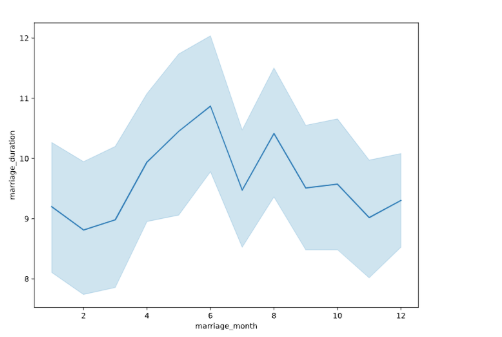

**(Output: Line plot visualization)**

### Line-by-Line Explanation

- `sns.lineplot(data=divorce, x="marriage_month", y="marriage_duration")`
    - **What:** Plots the mean `marriage_duration` for each `marriage_month`.
    - **Why:** To check if there's a relationship between month of marriage and how long marriages last before divorce.
    - **Result:** Blue line shows mean duration per month; shaded area shows 95% confidence interval.

- `plt.show()`
    - **What:** Displays the plot.

**Significance:**  
- The plot shows some variation in mean marriage duration by month.
- The wide confidence intervals suggest the mean can vary widely and more analysis is needed before drawing conclusions.

---

## 9. Summary and Next Steps

- **Key Points:**
    - Always ensure date/time columns are properly typed as DateTime in pandas for full analysis capabilities.
    - Use `pd.to_datetime()` to convert or combine columns into DateTime.
    - With DateTime columns, you can easily extract parts (month, year, etc.) for further analysis.
    - Visualize temporal patterns using line plots or similar charts.


---

# Quick Reference Table

| Task                                        | Code Example                                                      |
|----------------------------------------------|-------------------------------------------------------------------|
| Read CSV, parse date columns                 | `pd.read_csv('file.csv', parse_dates=['date_col'])`               |
| Convert string column to datetime            | `df['date_col'] = pd.to_datetime(df['date_col'])`                 |
| Combine month, day, year into DateTime       | `df['date'] = pd.to_datetime(df[['month','day','year']])`         |
| Extract month, year, day from DateTime       | `df['month'] = df['date'].dt.month`                               |
| Visualize pattern over time                  | `sns.lineplot(data=df, x='month', y='value'); plt.show()`         |

---


### Exercise
Importing DateTime data
You'll now work with the entire divorce dataset! The data describes Mexican marriages dissolved between 2000 and 2015. It contains marriage and divorce dates, education level, birthday, income for each partner, and marriage duration, as well as the number of children the couple had at the time of divorce.

The column names and data types are as follows:

divorce_date          object
dob_man               object
education_man         object
income_man           float64
dob_woman             object
education_woman       object
income_woman         float64
marriage_date         object
marriage_duration    float64
num_kids             float64

It looks like there is a lot of date information in this data that is not yet a DateTime data type! Your task is to fix that so that you can explore patterns over time.

pandas has been imported as pd.

Instructions
Import divorce.csv, saving as a DataFrame, divorce; indicate in the import function that the divorce_date, dob_man, dob_woman, and marriage_date columns should be imported as DateTime values.
```python
# Import divorce.csv, parsing the appropriate columns as dates in the import
divorce = pd.read_csv('divorce.csv', parse_dates=['divorce_date', 'dob_man', 'dob_woman', 'marriage_date'])
print(divorce.dtypes)

<script.py> output:
    divorce_date         datetime64[ns]
    dob_man              datetime64[ns]
    education_man                object
    income_man                  float64
    dob_woman            datetime64[ns]
    education_woman              object
    income_woman                float64
    marriage_date        datetime64[ns]
    marriage_duration           float64
    num_kids                    float64
    dtype: object
```

### Exercise
Updating data type to DateTime
Now, the divorce DataFrame has been loaded for you, but one column is stored as a string that should be DateTime data. Which one is it? Once you've identified the column, you'll update it so that you can explore it more closely in the next exercise.

pandas has been imported as pd.

Instructions 1/2
Question
Which of the columns in the divorce DataFrame has not been updated to a DateTime data type but should be?

Possible answersb


divorce_date

marriage_date

education_woman

num_kids

Convert the marriage_date column of the divorce DataFrame to DateTime values.
```python
# Convert the marriage_date column to DateTime values
divorce["marriage_date"] = pd.to_datetime(divorce['marriage_date'])
```

### Exercise
Visualizing relationships over time
Now that your date data is saved as DateTime data, you can explore patterns over time! Does the year that a couple got married have a relationship with the number of children that the couple has at the time of divorce? Your task is to find out!

The divorce DataFrame (with all dates formatted as DateTime data types) has been loaded for you. pandas has been loaded as pd, matplotlib.pyplot has been loaded as plt, and Seaborn has been loaded as sns.

Instructions 1/2

Define a column called marriage_year, which contains just the year portion of the marriage_date column.
```python
# Define the marriage_year column
divorce["marriage_year"] = divorce['marriage_date'].dt.year
```
Create a line plot showing the average number of kids a couple had during their marriage, arranged by the year that the couple got married.
```python
# Define the marriage_year column
divorce["marriage_year"] = divorce["marriage_date"].dt.year

# Create a line plot showing the average number of kids by year
sns.lineplot(data=divorce, x='marriage_year', y='num_kids')
plt.show()
```
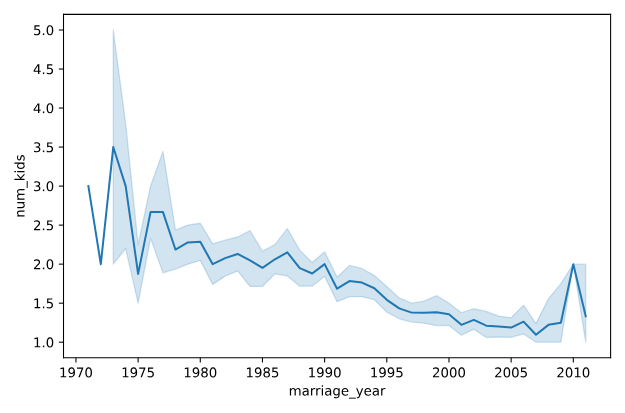

# Correlation  
*Exploratory Data Analysis in Python*  

---

## 1. What is Correlation?

- **Correlation** measures the **direction** and **strength** of a relationship between two variables.
    - Helps us understand if, and how, two variables move together.
    - Supports predictive modeling and deeper data understanding.

- **Pearson correlation coefficient**:
    - Values range from **-1** (perfect negative) to **1** (perfect positive).
    - **0** indicates no linear relationship.
    - Only measures **linear** relationships.

---

## 2. Calculating Correlations in Pandas

Use `.corr()` to get the pairwise correlation of numeric columns.

```python
divorce.corr(numeric_only=True)
```

**Output:**
```
                income_man  income_woman  marriage_duration  num_kids  marriage_year
income_man          1.000         0.318             0.085     0.041          0.019
income_woman        0.318         1.000             0.079    -0.018          0.026
marriage_duration   0.085         0.079             1.000     0.447         -0.812
num_kids            0.041        -0.018             0.447     1.000         -0.461
marriage_year       0.019         0.026            -0.812    -0.461          1.000
```

### Line-by-Line Explanation

- `divorce.corr(numeric_only=True)`
    - **What:** Calculates the Pearson correlation matrix for all numeric columns in the `divorce` DataFrame.
    - **Why:** To quickly see which pairs of variables are positively or negatively correlated.
    - **Output:** A matrix where each cell is the correlation coefficient between two columns.

**Significance:**  
- Negative values (e.g., -0.812 between `marriage_duration` and `marriage_year`) indicate an inverse relationship.
- Positive values (e.g., 0.318 between `income_man` and `income_woman`) show a direct relationship.

*Tip:* Setting `numeric_only=True` ensures non-numeric columns are ignored, preventing errors.

---

## 3. Visualizing Correlations: Heatmaps

A heatmap makes it easier to spot strong correlations visually.

```python
sns.heatmap(divorce.corr(numeric_only=True), annot=True)
plt.show()
```
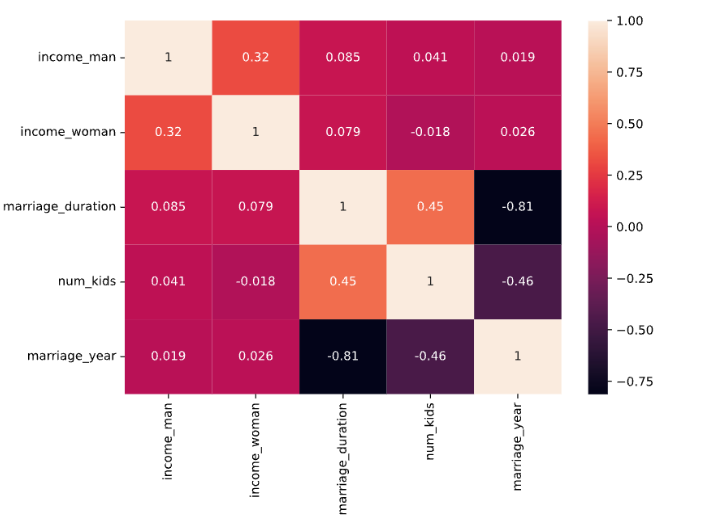

*(The output is a color-coded matrix with correlation coefficients shown in each cell.)*

### Line-by-Line Explanation

- `divorce.corr(numeric_only=True)`
    - **What:** Generates the correlation matrix as before.

- `sns.heatmap(..., annot=True)`
    - **What:** Plots the correlation matrix as a heatmap.
    - **Why:** Colors make strong positive/negative correlations visually obvious.
    - **Result:** Deep purple = strong positive, beige = strong negative.

- `plt.show()`
    - **What:** Displays the plot.

**Significance:**  
- Strong relationships are quickly apparent.  
- Example: Marriage year and marriage duration are strongly negatively correlated.

---

## 4. Correlation in Context

Always interpret correlations in the context of your dataset!

```python
divorce["divorce_date"].min()
```
**Output:**
```
Timestamp('2000-01-08 00:00:00')
```

```python
divorce["divorce_date"].max()
```
**Output:**
```
Timestamp('2015-11-03 00:00:00')
```

### Explanation

- `.min()` and `.max()` show the date range for divorces in the dataset.
- **Context:**  
  - Only marriages that ended between 2000–2015 are included.
  - Marriages that started earlier (lower `marriage_year`) *must* have lasted longer to appear in this dataset, explaining the negative correlation between `marriage_year` and `marriage_duration`.

---

## 5. Limitations of Pearson Correlation

- **Pearson coefficient** measures **linear** relationships only.
- Nonlinear relationships may exist even if the coefficient is near zero.
- Always supplement with visualizations!
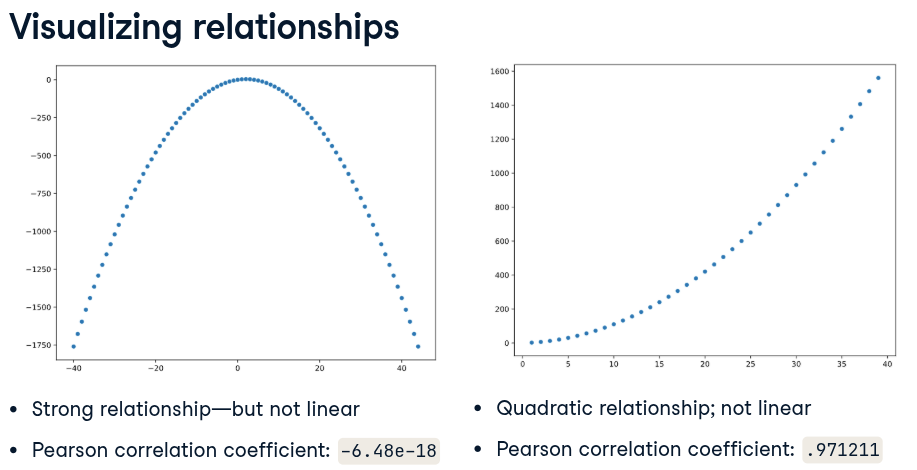
---

## 6. Visualizing Relationships: Scatter Plots

Use a scatter plot to visually assess the relationship between two variables.

```python
sns.scatterplot(data=divorce, x="income_man", y="income_woman")
plt.show()
```
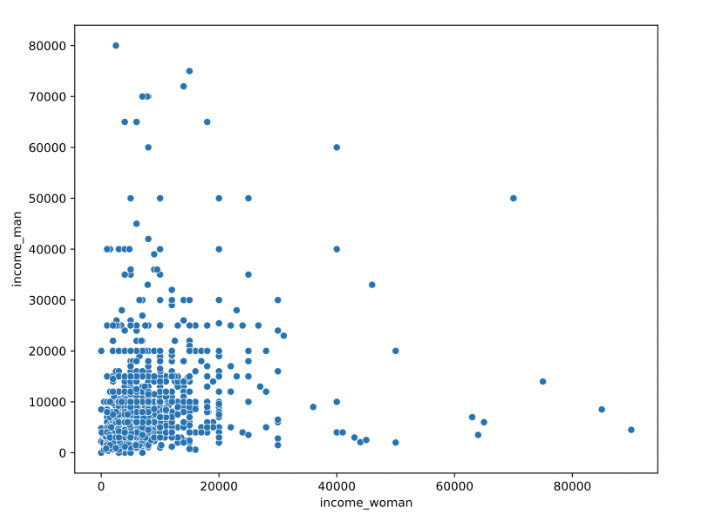

*(The output is a scatter plot of male vs. female partner incomes.)*

### Line-by-Line Explanation

- `sns.scatterplot(data=divorce, x="income_man", y="income_woman")`
    - **What:** Plots each row as a point, with x = male income, y = female income.
    - **Why:** To see if higher male incomes are paired with higher female incomes.
    - **Result:** A cloud of points; correlation visible as a trend.

- `plt.show()`
    - **What:** Displays the plot.

**Significance:**  
- The scatter plot confirms a *weak positive* relationship (r ≈ 0.32), as shown in the correlation matrix.

---

## 7. Exploring Multiple Relationships: Pairplots

Pairplots show all pairwise relationships between numeric variables.

```python
sns.pairplot(data=divorce)
plt.show()
```
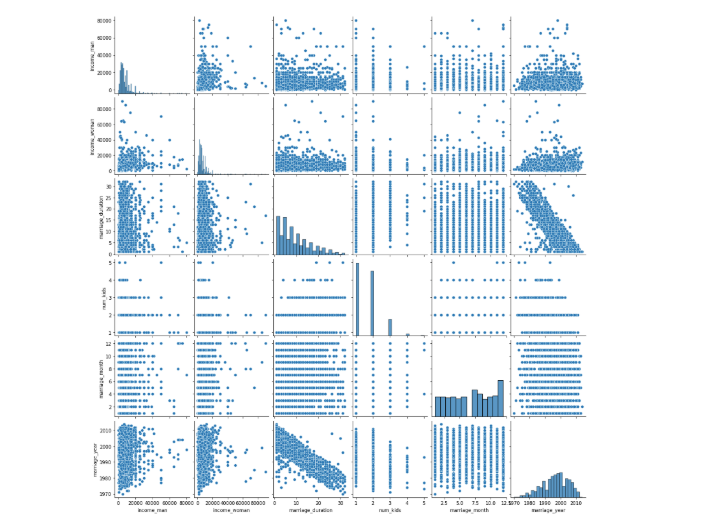

*(The output is a grid of scatter plots for each pair of numeric variables, with histograms on the diagonal.)*

### Line-by-Line Explanation

- `sns.pairplot(data=divorce)`
    - **What:** Plots all pairwise combinations of numerical columns.
    - **Why:** To get an overview of possible relationships in one figure.
    - **Result:** Dense grid of scatter plots and distributions.

- `plt.show()`
    - **What:** Displays the plot.

**Significance:**  
- Useful for small datasets.
- For large datasets, plots and labels can be small and hard to read.

---

## 8. Focusing Pairplots with Selected Variables

Limit pairplot to variables of interest for clarity.

```python
sns.pairplot(data=divorce, vars=["income_man", "income_woman", "marriage_duration"])
plt.show()
```
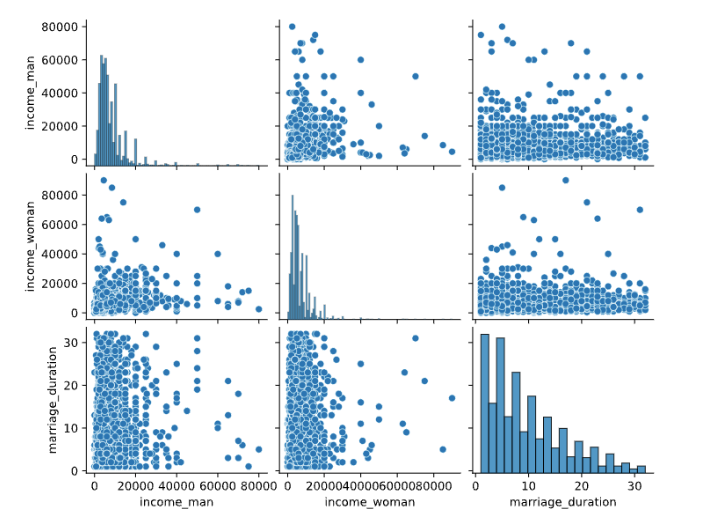

*(The output is a smaller grid focusing on the selected variables.)*

### Line-by-Line Explanation

- `vars=[...]`
    - **What:** Limits the variables shown in the pairplot.
    - **Why:** Focuses on relationships that matter most for your analysis.
    - **Result:** Easier to interpret, less clutter.

**Significance:**  
- The plot confirms weak relationships between these variables.
- The distribution of `marriage_duration` shows many short marriages, few long ones.

---

## 9. Key Takeaways

- **Correlation** quantifies linear relationships between variables.
- Use `.corr()` for quick numeric overviews.
- Use **heatmaps** and **scatter plots** for visual insights.
- Always **interpret correlations in context**—understand what your data represents!
- Supplement correlation coefficients with **visualizations** (scatter plots, pairplots).
- Use **pairplots** for a broad overview; restrict variables for clarity in large datasets.

---

## 10. Quick Reference Table

| Task                         | Code Example                                         |
|------------------------------|------------------------------------------------------|
| Calculate correlation matrix | `df.corr(numeric_only=True)`                         |
| Correlation heatmap          | `sns.heatmap(df.corr(numeric_only=True), annot=True)`|
| Scatter plot                 | `sns.scatterplot(data=df, x='col1', y='col2')`       |
| Pairplot (all numerics)      | `sns.pairplot(data=df)`                              |
| Pairplot (selected vars)     | `sns.pairplot(data=df, vars=['col1','col2','col3'])` |

---

 ### Exercise
Interpreting a heatmap
Which of the below statements is correct regarding the relationships between variables in the divorce DataFrame?

The divorce DataFrame has been loaded for you so that you can explore it in the shell. pandas has been loaded as pd, matplotlib.pyplot has been loaded as plt, and Seaborn has been loaded as sns.

Instructions
Possible answersd


marriage_duration is strongly positively correlated with marriage_month.

The correlation between num_kids and income_man is stronger than the correlation between num_kids and marriage_duration.

A later marriage_year causes a lower number of children, represented by num_kids.

A later marriage_year is correlated with having fewer children.



### Exercise
Visualizing variable relationships
In the last exercise, you may have noticed that a longer marriage_duration is correlated with having more children, represented by the num_kids column. The correlation coefficient between the marriage_duration and num_kids variables is 0.45.

In this exercise, you'll create a scatter plot to visualize the relationship between these variables. pandas has been loaded as pd, matplotlib.pyplot has been loaded as plt, and Seaborn has been loaded as sns. The dataset name is divorce.

Instructions
Create a scatterplot showing marriage_duration on the x-axis and num_kids on the y-axis.
```python
# Create the scatterplot
sns.scatterplot(data=divorce, x='marriage_duration', y='num_kids')
plt.show()
```
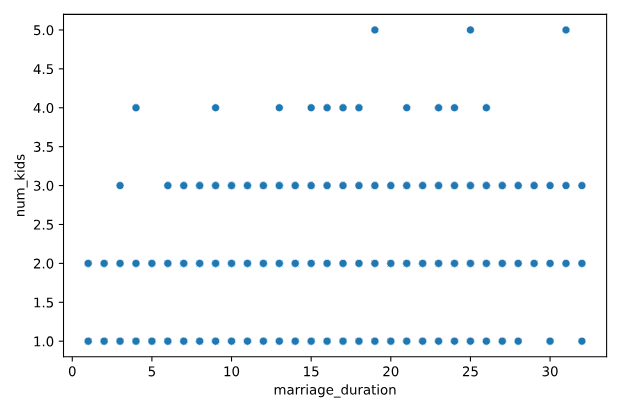

### Exercise
Visualizing multiple variable relationships
Seaborn's .pairplot() is excellent for understanding the relationships between several or all variables in a dataset by aggregating pairwise scatter plots in one visual.

Your task is to use a pairplot to compare the relationship between marriage_duration and income_woman. pandas has been loaded as pd, matplotlib.pyplot has been loaded as plt, and Seaborn has been loaded as sns.

Instructions

Create a pairplot to visualize the relationships between income_woman and marriage_duration in the divorce DataFrame.
```python
# Create a pairplot for income_woman and marriage_duration
sns.pairplot(data=divorce, vars=['income_woman' , 'marriage_duration'])
plt.show()
```
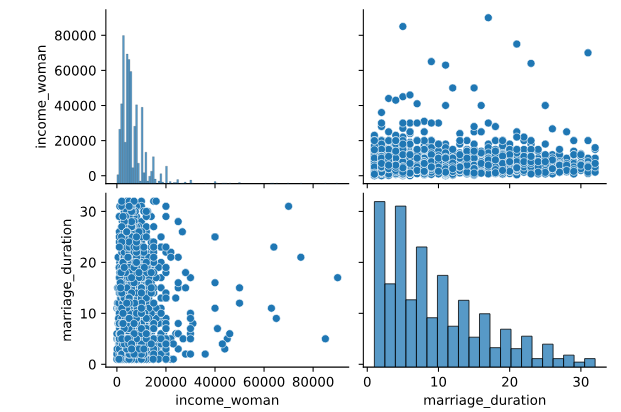

# Factor Relationships and Distributions  
*Exploratory Data Analysis in Python*  

---

## 1. Introduction to Factor (Categorical) Relationships

- So far, we've mainly examined relationships between **numerical variables**.
- **Categorical variables** (also called *factors*) are equally important in understanding data.
- Their relationships are more challenging to summarize with numbers, so **visualization** is critical.

---

## 2. Exploring Male Partner's Education Level

To start, let's investigate the distribution of education levels among the male partners in the dataset.

### Code Example: Value Counts

```python
divorce["education_man"].value_counts()
```

#### **Expected Output:**

```
Professional    1313
Preparatory      501
Secondary        288
Primary          100
None               4
Other              3
Name: education_man, dtype: int64
```

### **Line-by-Line Explanation:**

- `divorce["education_man"]`
  - Selects the `education_man` column from the `divorce` DataFrame.
  - This column holds the education level for each male partner in the dataset.
- `.value_counts()`
  - Counts the number of occurrences of each unique value (education level) in the column.
  - Returns a Series where the index is the education level, and the value is the count.

### **Significance:**

- Shows that **most men have education from "Primary" up to "Professional"**.
- Very few have "None" or "Other" as their education category.

---

## 3. Visualizing Categorical Relationships

Since categorical relationships are tricky to summarize numerically, let's visualize the data.

### **Histogram of Marriage Duration**

```python
sns.histplot(data=divorce, x="marriage_duration", binwidth=1)
plt.show()
```
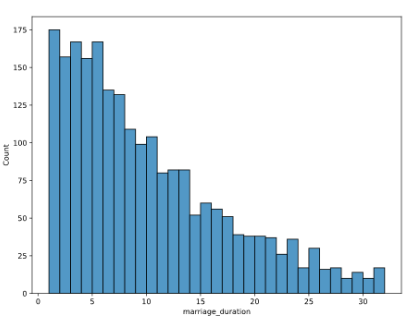

#### **Expected Output:**

A histogram plot displaying the distribution of `marriage_duration` (number of years married before divorce).

### **Line-by-Line Explanation:**

- `sns.histplot(...)`
  - Creates a histogram of the `marriage_duration` column.
  - `data=divorce`: Uses the `divorce` DataFrame.
  - `x="marriage_duration"`: Plots the `marriage_duration` variable on the x-axis.
  - `binwidth=1`: Each bar represents one year of marriage duration.
- `plt.show()`
  - Renders the plot.

### **Significance:**

- Gives a quick overview of how long marriages tend to last before divorce in the dataset.

---

## 4. Adding Education Level to the Histogram

To see how **education level** relates to **marriage duration**, use the `hue` argument.

```python
sns.histplot(data=divorce, x="marriage_duration", hue="education_man", binwidth=1)
plt.show()
```
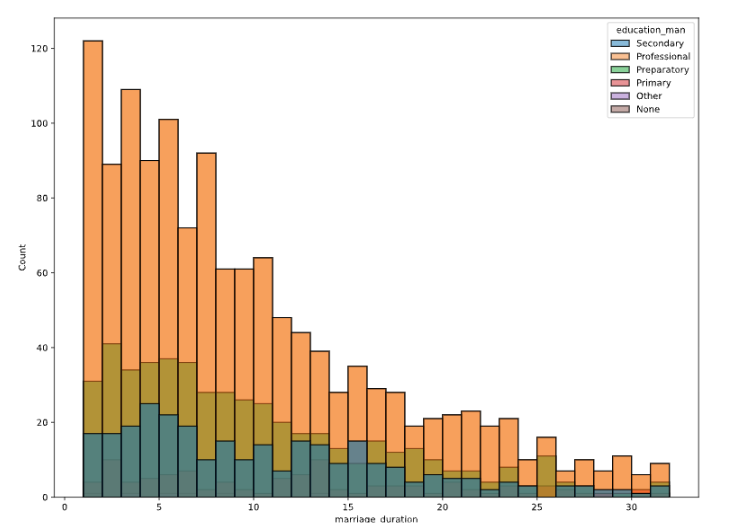

#### **Expected Output:**

A stacked histogram where each bar is divided by color, showing the counts for each education level at each marriage duration.

### **Line-by-Line Explanation:**

- `hue="education_man"`
  - Each education level is assigned a different color in the histogram, so we can compare distributions.

### **Significance:**

- Shows that **most data points are for men with "Professional" education** (as seen in value_counts).
- However, stacked bars make it **hard to clearly compare the distributions** between education levels.

---

## 5. Kernel Density Estimate (KDE) Plots

**KDE plots** provide a smoother, more interpretable view of distributions, especially for comparing multiple categories.

```python
sns.kdeplot(data=divorce, x="marriage_duration", hue="education_man")
plt.show()
```
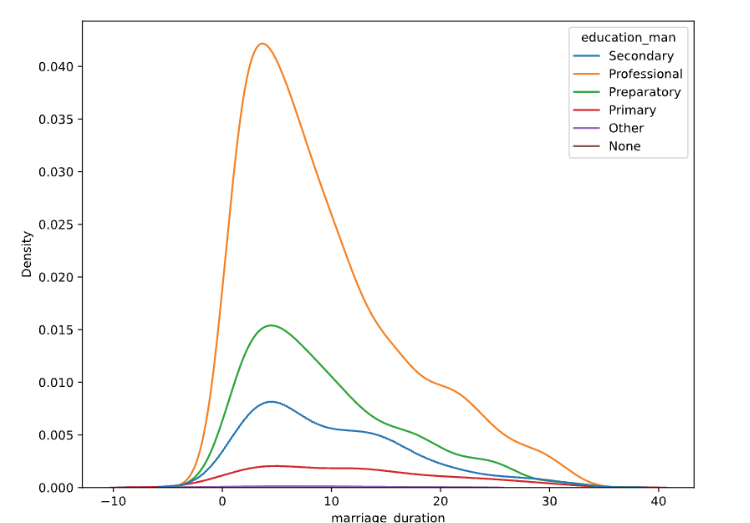

#### **Expected Output:**

A set of smoothed curves, one per education level, showing the *estimated distribution* of marriage duration for each group.

### **Line-by-Line Explanation:**

- `sns.kdeplot(...)`
  - Creates a kernel density estimate plot.
  - `hue="education_man"`: Each education level has its own curve.
- `plt.show()`
  - Displays the plot.

### **Significance:**

- Peaks of each curve show the most common marriage durations per education group.
- **Easier to compare distributions** than with stacked histograms.

---

## 6. Caution: KDE Smoothing Can Produce Impossible Values

- KDE smoothing can extend the curve **outside the real data range**.
- Example: The plot might suggest negative marriage durations (impossible!).
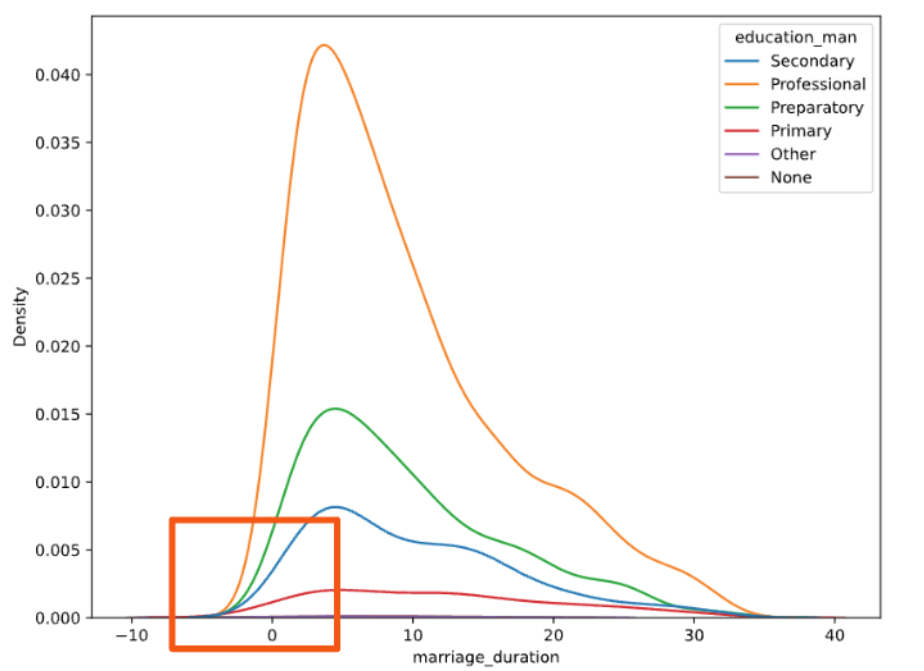
---

## 7. Fixing KDE Boundaries with `cut=0`

Limit the KDE plot to the observed data range to avoid nonsensical values.

```python
sns.kdeplot(data=divorce, x="marriage_duration", hue="education_man", cut=0)
plt.show()
```
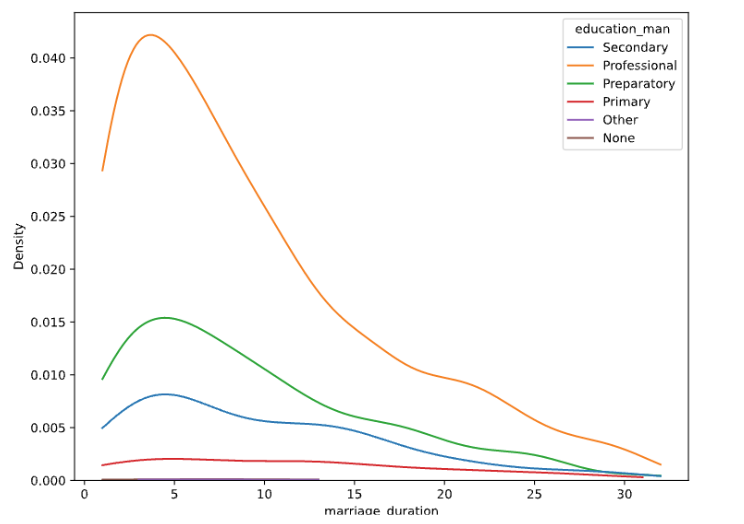

#### **Expected Output:**

KDE curves only between the minimum and maximum observed marriage durations (no negative durations).

### **Line-by-Line Explanation:**

- `cut=0`
  - Prevents the KDE curve from extending beyond the minimum and maximum values in the data.

### **Significance:**

- **Improves plot accuracy** by only showing realistic values for marriage duration.

---

## 8. Cumulative KDE Plots

To visualize the **cumulative distribution function** (CDF):

```python
sns.kdeplot(data=divorce, x="marriage_duration", hue="education_man", cut=0, cumulative=True)
plt.show()
```
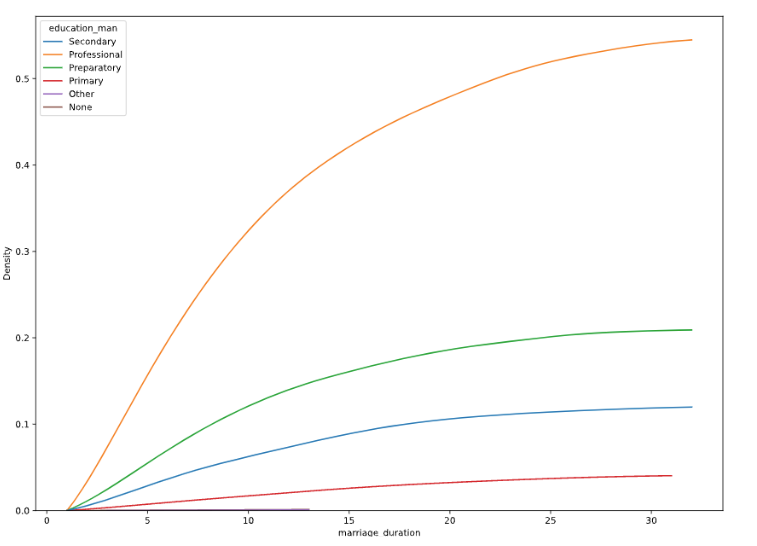

#### **Expected Output:**

A set of curves, one per education level, rising from 0 to 1. Each curve shows the proportion of marriages that ended by a given duration.

### **Line-by-Line Explanation:**

- `cumulative=True`
  - Plots the cumulative distribution (CDF) instead of the probability density function (PDF).

### **Significance:**

- Shows, **for each education level**, the probability that a marriage ends (by divorce) at or before a given duration.
- Useful for comparing how quickly marriages tend to end across education levels.

---

## 9. Relationship Between Age at Marriage and Education

Hypothesis: Are higher education levels associated with getting married at older ages?

### **Creating Age-at-Marriage Columns**

```python
divorce["man_age_marriage"] = divorce["marriage_year"] - divorce["dob_man"].dt.year
divorce["woman_age_marriage"] = divorce["marriage_year"] - divorce["dob_woman"].dt.year
```

#### **Line-by-Line Explanation:**

- `divorce["marriage_year"]`
  - The year in which the marriage occurred.
- `divorce["dob_man"].dt.year`
  - The birth year of the man (using pandas datetime accessor).
- `divorce["marriage_year"] - divorce["dob_man"].dt.year`
  - Calculates the man's approximate age at marriage.
- Similarly for `woman_age_marriage`.

#### **Purpose:**

- **Create new columns** for each partner's age at the time of marriage.
- Necessary for **numerical analysis and visualization**.

---

## 10. Scatter Plot: Age at Marriage (Women vs. Men)

```python
sns.scatterplot(data=divorce, x="woman_age_marriage", y="man_age_marriage")
plt.show()
```
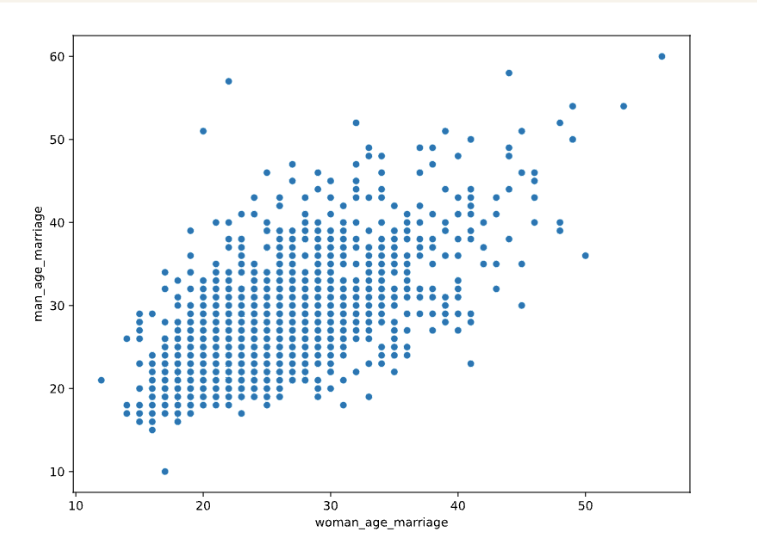

#### **Expected Output:**

A scatter plot with each point representing a couple:
- x-axis: Woman's age at marriage
- y-axis: Man's age at marriage

### **Line-by-Line Explanation:**

- `sns.scatterplot(...)`
  - Plots a point for each observation.
- `x="woman_age_marriage"`
  - Woman's age at marriage on the x-axis.
- `y="man_age_marriage"`
  - Man's age at marriage on the y-axis.

### **Significance:**

- Shows a **positive correlation**: older women tend to marry older men.
- The Pearson correlation coefficient is **0.69**, indicating a strong linear relationship.

---

## 11. Scatter Plot with Categorical Hue: Adding Education

To add **education level** to the scatter plot, use the `hue` argument:

```python
sns.scatterplot(
    data=divorce,
    x="woman_age_marriage",
    y="man_age_marriage",
    hue="education_man"
)
plt.show()
```
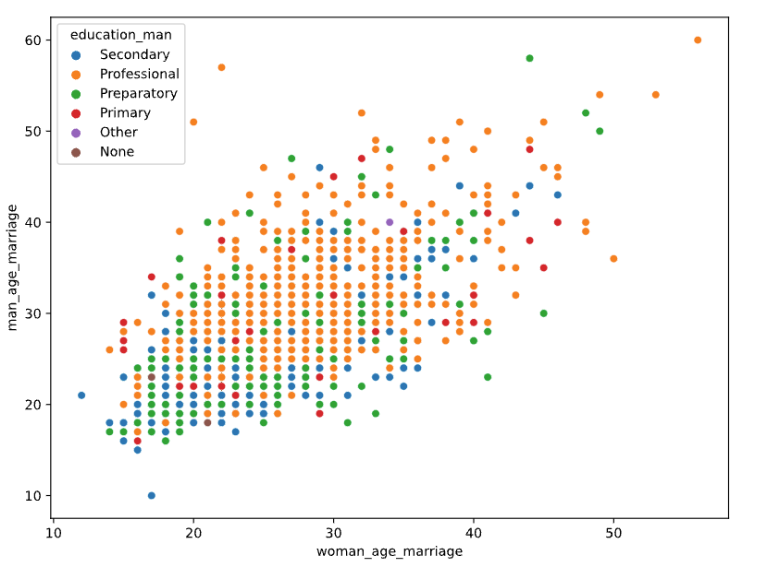

#### **Expected Output:**

- Each point is colored by the man's education level.
- For example, "Professional" could be orange.
- Patterns by color may emerge.

### **Line-by-Line Explanation:**

- `hue="education_man"`
  - Points are colored by the man's education level.

### **Significance:**

- Suggests that men with a "Professional" education (orange dots) **tend to marry at older ages**.
- Helps visually assess **interactions between numerical and categorical variables**.

---

## **Summary Table of Techniques**

| Technique                   | Code Example                                | Purpose                                                         |
|-----------------------------|---------------------------------------------|-----------------------------------------------------------------|
| Value counts                | `value_counts()`                            | Summarize frequency of categorical values                       |
| Histogram                   | `sns.histplot(..., binwidth=1)`             | Show distribution of a numeric variable                         |
| Histogram with hue          | `sns.histplot(..., hue="category")`         | Compare distributions by category                               |
| KDE plot                    | `sns.kdeplot(..., hue="category")`          | Smoothed comparison of distributions                            |
| KDE with cut=0              | `sns.kdeplot(..., cut=0)`                   | Limit KDE to real data range                                    |
| Cumulative KDE              | `sns.kdeplot(..., cumulative=True)`         | Show CDF by category                                            |
| New age columns             | `df["age"] = ...`                           | Feature engineering for further analysis                        |
| Scatter plot                | `sns.scatterplot(x=..., y=...)`             | Show relationship between two numerical variables               |
| Scatter with hue            | `sns.scatterplot(..., hue="category")`      | Add categorical dimension to scatter plot                       |

---


### Exercise
Categorical data in scatter plots
In the video, we explored how men's education and age at marriage related to other variables in our dataset, the divorce DataFrame. Now, you'll take a look at how women's education and age at marriage relate to other variables!

Your task is to create a scatter plot of each woman's age and income, layering in the categorical variable of education level for additional context.

The divorce DataFrame has been loaded for you, and woman_age_marriage has already been defined as a column representing an estimate of the woman's age at the time of marriage. pandas has been loaded as pd, matplotlib.pyplot has been loaded as plt, and Seaborn has been loaded as sns.

Instructions

Create a scatter plot that shows woman_age_marriage on the x-axis and income_woman on the y-axis; each data point should be colored based on the woman's level of education, represented by education_woman.
```python
# Create the scatter plot
sns.scatterplot(data=divorce, x= 'woman_age_marriage', y= 'income_woman', hue='education_woman')
plt.show()
```
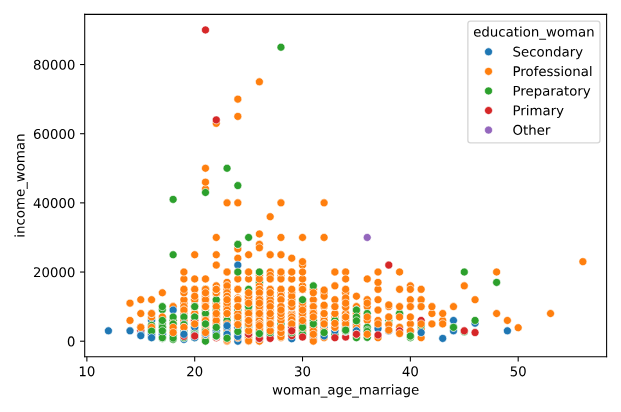

### Exercise
Exploring with KDE plots
Kernel Density Estimate (KDE) plots are a great alternative to histograms when you want to show multiple distributions in the same visual.

Suppose you are interested in the relationship between marriage duration and the number of kids that a couple has. Since values in the num_kids column range only from one to five, you can plot the KDE for each value on the same plot.

The divorce DataFrame has been loaded for you. pandas has been loaded as pd, matplotlib.pyplot has been loaded as plt, and Seaborn has been loaded as sns. Recall that the num_kids column in divorce lists only N/A values for couples with no children, so you'll only be looking at distributions for divorced couples with at least one child.

Instructions 1/3

Create a KDE plot that shows marriage_duration on the x-axis and a different colored line for each possible number of children that a couple might have, represented by num_kids.
```python
# Create the KDE plot
sns.kdeplot(data=divorce, x='marriage_duration', hue='num_kids')
plt.show()
```
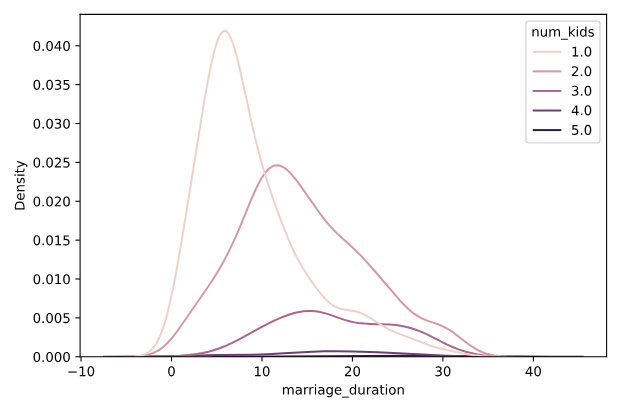

Notice that the plot currently shows marriage durations less than zero; update the KDE plot so that marriage duration cannot be smoothed past the extreme data points.
```python
# Update the KDE plot so that marriage duration can't be smoothed too far
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0)
plt.show()
```
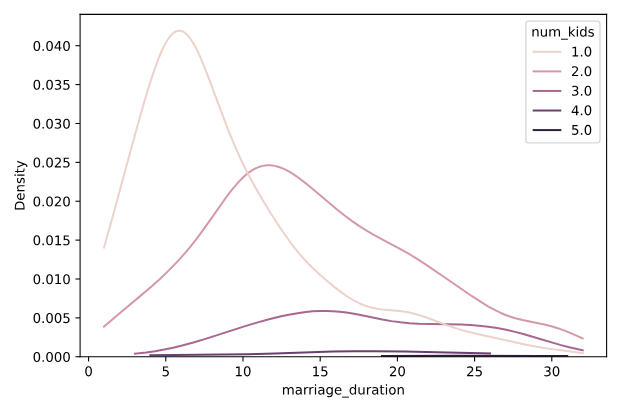

Update the code for the KDE plot from the previous step to show a cumulative distribution function for each number of children a couple has.
```python
# Update the KDE plot to show a cumulative distribution function
sns.kdeplot(data=divorce, x="marriage_duration", hue="num_kids", cut=0, cumulative=True)
plt.show()
```
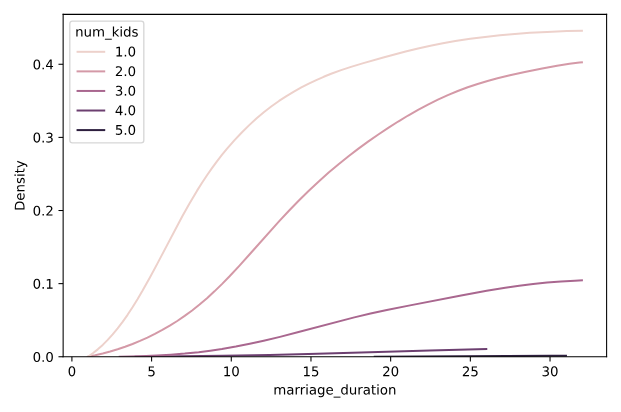

In [ ]:
# CHap #03 End